In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.display import display
import sys
import os
import logging

sys.path.insert(0,'../src')
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
from io_utils import load_data_from_file
from main_methods import select_spatial_genes
from sim_utils import evaluate_rejections
from general_utils import norm_mtx
sns.set(style="whitegrid")


def load_results(method, sim_dir):
    sim_fn = os.path.join(sim_dir, 'sim_setup.csv')
    sim_df = load_data_from_file(sim_fn, 'csv')
    meth_dir = 'result_{}'.format(method)
    meth_dir = os.path.join(sim_dir, meth_dir)
    eval_fn = 'eval_{}.csv'.format(method)
    eval_fn = os.path.join(sim_dir, eval_fn)
    eval_df = load_data_from_file(eval_fn, 'csv')
    eval_df = sim_df[['seed', 'temp']].join(eval_df)
    eval_df['method'] = method
    return eval_df

def load_simulation(sim_dir):
    method = 'ours'
    df_list = []
    for method in ['ours', 'spatialde', 'scgco']:
        sdf = load_results(method, sim_dir)
        df_list.append(sdf)
    df = pd.concat(df_list)
    display(df.shape)
    display(df.head())
    return df

def plot_comp(df, metric):
    fig, ax = plt.subplots(1, 1, figsize=(6, 3))
    sns.boxplot(x='temp', y=metric, hue='method', data=df, 
                palette="Set1", ax=ax)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

(240, 5)

,seed,temp,FDP,Power,method
0,0,linear,0.037500,0.77,ours
1,0,diaquad,0.012346,0.80,ours
2,0,radial,0.048780,0.78,ours
3,0,cosine,0.050633,0.75,ours
4,1,linear,0.012987,0.76,ours


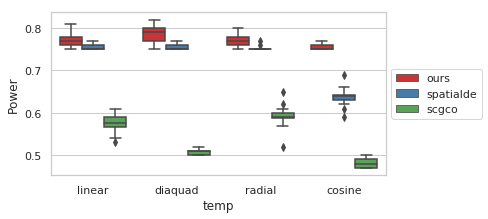

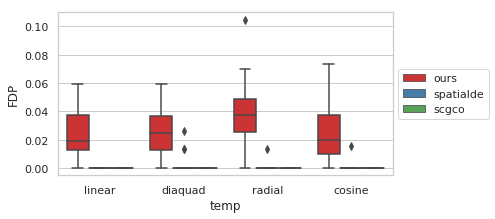

In [48]:
sim_dir = '/scratch/PI/sabatti/space_comp_sim/20191104'
df1 = load_simulation(sim_dir)
plot_comp(df1, 'Power')
plot_comp(df1, 'FDP')

(240, 5)

,seed,temp,FDP,Power,method
0,0,linear,0.029126,1.00,ours
1,0,diaquad,0.030000,0.97,ours
2,0,radial,0.019608,1.00,ours
3,0,cosine,0.061728,0.76,ours
4,1,linear,0.009901,1.00,ours


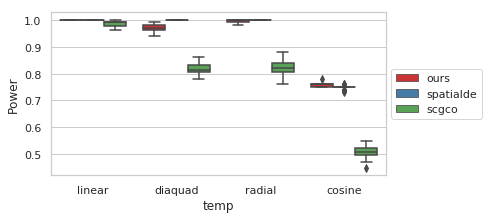

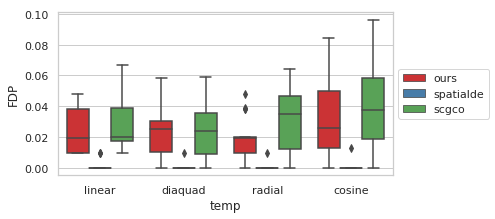

In [41]:
sim_dir = '/scratch/PI/sabatti/space_comp_sim/20191030'
df2 = load_simulation(sim_dir)
plot_comp(df2, 'Power')
plot_comp(df2, 'FDP')